# Analyzing Categorical Data
These notebooks will follow the several resources I am using to better understand Statistics.

In this unit, I will cover the following:
- Analyzing one categorical variable
- Two-way tables
- Distributions in two-way tables

## Importing the data

### to-do's

- ~~Explain where I got the data~~
- What the data represents
- That it's pre-cleaned (?) and that's okay, because that isn't the focus of this lesson
- ~~Include link to source~~

### Import the libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import the data

I was originally going to use the Iris dataset, but I felt that there were too few categorical variables to make the examples diverse. So I perused Kaggle and found [this](https://www.kaggle.com/datasets/arnavsmayan/amazon-prime-userbase-dataset) dataset that worked well for the topics covered in the first unit.

In [73]:
# I've gone ahead an ensure that some of the column types were set ahead of time for code below
amazon_users = pd.read_csv(
    'Data/amazon_prime_users.csv',
    parse_dates=['Date of Birth', 'Membership Start Date', 'Membership End Date'],
    dtype={'Engagement Metrics': pd.CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True)}
    )

## Investigating the data

### to-do's

- ~~Print out the data using various methods~~
- ~~Look at data types~~
- ~~Define definitions above with concrete examples~~ --> do we want to link back to these in the future?

### Data Snapshot

There are two distinct methods for looking at a subset of your imported data: using the `.head()` method, or the `.sample()` method. Both functions do not require an argument to pass through them, but can accept them.

The `.head()` function accepts an integer that outlines the number of rows you want returned, where the default value is 5.

The `.sample()` function can accept an integer that outlines the number of random rows you want returned, or a float that represents the proprotion of total rows you want returned. The default return is one random row.

In [36]:
amazon_users.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


In [37]:
amazon_users.sample()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
2250,2251,Heather Williams,ramirezanna@example.com,ramirezanna,1979-02-20,Male,North Kara,2024-01-12,2025-01-11,Monthly,Mastercard,Auto-renew,Frequent,Electronics,Documentary,Tablet,Medium,3.8,1


### Data Types

Looking at the top five rows in the dataset, we can see that there are many columns containing several different data types. Columns like `Name`, `Gender`, and `Engagement Metrics` are *Categorical Variables* and columns like `Feedback/Ratings` and `Customer Support Interactions` are *Numerical Variables*.

More specifically, the *Categorical Variables* mentioned above can be split into two distinct subgroups of data types: *Nominal* and *Ordinal*. *Nominal Variables* are *Categorical Variables* with no intrinsic ordering. For instance, sorting `Gender` by any method in particular (e.g., alphabetical, or other) is arbitrary, and would not imply that `Female` is associated with a greater amount or larger value than `Male`, should `Female` appear before `Male` in a list. *Ordinal Variables*, on the other hand, do have an intrinsic ordering to them. When looking at the `Engagement Metrics` column, we see that there is a distinct set of three values: `Medium, Low, High`. If that list felt odd to read in that order, that is because there is an associated relative value with each of these variables, where `Low` is considered to be less than `Medium`, and `Medium` is considered to be less than `High`, so the list, when sorted, should not be sorted alphabetically, but by their relative values: `Low, Medium, High`.

In [38]:
print(f'For the column "Engagement Metrics" the unique set of values is: {amazon_users['Engagement Metrics'].unique().sort_values()}')

For the column "Engagement Metrics" the unique set of values is: ['Low', 'Medium', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']


Like *Categorical Variables*, *Numerical Variables* can come in two flavors: *Discrete* and *Continuous*. When is comes to distinguishing these two subtypes, the general rule of thumb centers around the "countability" and "divisibility" of the data in the set. For instance, `Customer Support Interactions` is comprised of integers that range from 0-10. Additionally, an interaction cannot be divided into smaller parts, as you either had one interaction or haven't had a particular interaction. `Feedback/Ratings`, depending on how it is derived, could be either a *Discrete* or *Continuous Variable*. If this column represents a singular rating, that would imply users could select from among 50 distinct floating point numbers between 1.0-5.0 (or 60 distinct floating point numbers if options ranged from 0.0-5.0). In this scenario, the possible set of values is both countable and indivisible, and therefore would be a *Discrete Variable*. However, if this column represents the average rating of `Customer Support Interactions`, then it would be *Continuous Variable*, as the set of values prior to rounding to the tenths place, are infinite (think three rating with a total score of 4, that would be an average rating of 1.3 repeating).

In [39]:
print('''For the column "Customer Support Interactions" the range of data is represented below:
The mininum number of interactions is: 0
The maximum number of interactions is: 10\n''')

print('''For the column "Feedback/Ratings" the range of data is represented below:
The mininum rating is: 3.0
The maximum rating is: 5.0''')

For the column "Customer Support Interactions" the range of data is represented below:
The mininum number of interactions is: 0
The maximum number of interactions is: 10

For the column "Feedback/Ratings" the range of data is represented below:
The mininum rating is: 3.0
The maximum rating is: 5.0


### Identifying variable types in pandas

#### Categorical

In pandas, *categorical* is a special kind of object, so instead you can pass the `'object'` string through the `.select_dtypes()` function to return categorical variables. You could also look at the columns no present in the return value of the `.describe()` function outlined below, but this function is more time efficient.

In [40]:
amazon_users.select_dtypes('object')

,Name,Email Address,Username,Gender,Location,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used
0,Ronald Murphy,williamholland@example.com,williamholland,Male,Rebeccachester,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV
1,Scott Allen,scott22@example.org,scott22,Male,Mcphersonview,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone
2,Jonathan Parrish,brooke16@example.org,brooke16,Female,Youngfort,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV
3,Megan Williams,elizabeth31@example.net,elizabeth31,Female,Feliciashire,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV
4,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,Male,Port Deborah,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Michael Lopez,williamsroberto@example.org,williamsroberto,Male,Smithport,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone
2496,Matthew Woodard,lkaiser@example.com,lkaiser,Male,Ethanport,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV
2497,Morgan Barnes,erikaholland@example.net,erikaholland,Female,Alexandraborough,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet
2498,Gina Castaneda,reedcourtney@example.net,reedcourtney,Female,Williammouth,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone


#### Numerical

An easy way to identify numerical data in a dataframe - assuming the datatypes were correctly identified by python - is by using the `.describe()` function on your dataframe, as that will return descriptive statistics on numerical columns only.

You still have to use your best judgment, as we can see that `User ID` was also capture in this, due to the fact that the IDs are numbers, but should really be considered as a *categorical*, or more specifically, *ordinal* variable. This can also be seen by the inclusion of the date columns, because pandas stores them as datetime objects. The specific data type for dates can differ in how they're used. In some ways the can be a *nominal variable* if we're interested in counting the number of occurences of each, an *ordinal variable* if we want to maintain its intrinsic order, a *continuous variable* if we care about the specific time of day something occurred (i.e., including the hours, minutes, seconds, ms, etc.), or an interval variable - not discussed in the Khan Academy lessons, so we will irgnore for now.

In [41]:
amazon_users.describe()

,User ID,Date of Birth,Membership Start Date,Membership End Date,Feedback/Ratings,Customer Support Interactions
count,2500.00000,2500,2500,2500,2500.000000,2500.000000
mean,1250.50000,1969-10-10 10:15:10.080000,2024-02-21 21:11:48.480000,2025-02-20 21:11:48.480000,4.004760,4.951600
min,1.00000,1933-04-26 00:00:00,2024-01-01 00:00:00,2024-12-31 00:00:00,3.000000,0.000000
25%,625.75000,1951-04-30 00:00:00,2024-01-26 00:00:00,2025-01-25 00:00:00,3.500000,2.000000
50%,1250.50000,1969-12-07 12:00:00,2024-02-22 00:00:00,2025-02-21 00:00:00,4.000000,5.000000
75%,1875.25000,1988-03-28 06:00:00,2024-03-20 00:00:00,2025-03-20 00:00:00,4.500000,8.000000
max,2500.00000,2006-04-11 00:00:00,2024-04-14 00:00:00,2025-04-14 00:00:00,5.000000,10.000000
std,721.83216,NaN,NaN,NaN,0.580769,3.191572


## Analyzing one categorical variable

#### Pictographs

Pictographs are a kind of chart that uses pictures or symbols, attached to some value outlined in the chart legend, to plot the number of occurences of a particular set of *categorical* data. In order to set up a pictograph, I have set up some code below to analyze the `Customer Support Interactions` column.

##### 1. Choose the value of the pictogram.

In [42]:
# Ideally keep this value between 1 and 3, and definitely at or below 10!
pictogram_value = 2

##### 2. Find data evenly divisible by the `pictogram_value` for ease of use

In [43]:
pictograph_data = amazon_users[['Name', 'Customer Support Interactions']][amazon_users['Customer Support Interactions'] % pictogram_value == 0]

##### 3. Change the column names for ease of use (preference)

In [44]:
pictograph_data.columns = ['Name', 'Interactions']

##### 4. Divide the interactions column by the `pictogram_value`

Return a column in units of pictograms

In [45]:
pictograph_data['Interactions'] = pictograph_data['Interactions'].apply(lambda x: int(x / pictogram_value)) # We want these to remain as integers

##### 5. Use the .head() function to return a subset of the dataframe for consistent outcomes

If desired, you can use the .sample() function if you want to see the chart change with every cell execution. 

*Changing parameters outside recommended values may yield errors.

In [46]:
# The interactions columns are now in units of the pictogam_value
pictograph_data = pictograph_data.head(4)
pictograph_data

,Name,Interactions
2,Jonathan Parrish,4
5,Sandra Cox,1
6,Benjamin Marshall,5
7,James Smith,3


##### 6. Alter the `Interactions` column so that it is a range of values to display the number of points

In [47]:
# This method is crude, but the maximum number of possible iterations for four users will be 36, so I will settle for this implementation for now
new_row_df = pd.DataFrame() # Helps to clear on any new cell executions
for i in range(len(pictograph_data)):
    # Obtain the user and the number of interactions
    user = pictograph_data.iloc[i,0]
    interactions = pictograph_data.iloc[i,1]
    for j in range(1,interactions): # Add a new row for each user for interactions 1 - (n-1)
        new_row = pd.DataFrame({'Name': user, 'Interactions': j}, index = [0])
        new_row_df = pd.concat([new_row_df, new_row], ignore_index=True)

# Add to the dataframe
pictograph_data = pd.concat([pictograph_data, new_row_df], ignore_index=True)

##### 7. Plot

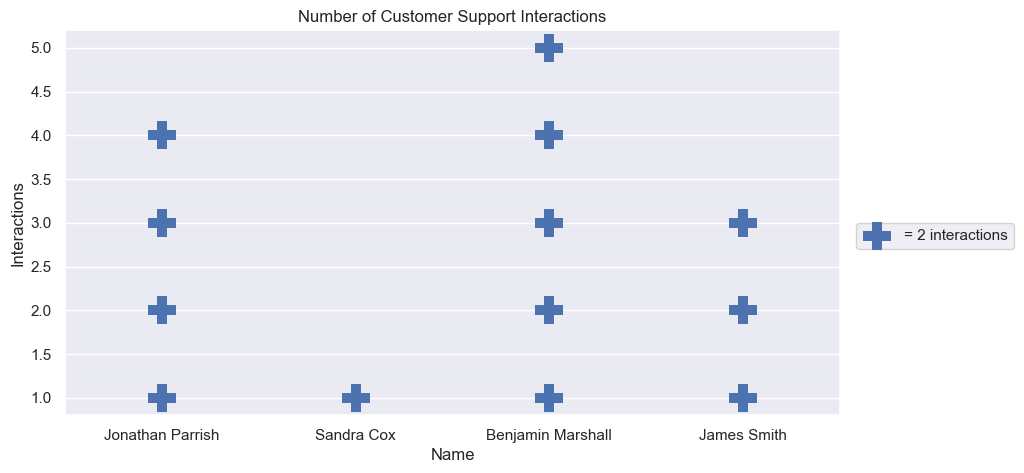

In [48]:
sns.stripplot(
        data=pictograph_data,
        x='Name',
        y='Interactions',
        jitter=False,
        marker='P', # This will change the pictogram used
        size=20,
        )

plt.legend(
        bbox_to_anchor=(1.02, .5), # (horizontal, vertical)
        loc=2, # location
        borderaxespad=0, # padding between legend and chart
        labels=[f'= {pictogram_value} interactions']) # This will dynamically update the legend according to the values above
plt.title('Number of Customer Support Interactions'); # Semicolon hides unnecessary printed data

#### Bar Charts

For this chart it could be interesting to look at the `Favorite Genres` column. To do this, we can use the pandas `.groupby()` function to count the number of each genre type in the column, store that in its own variable, and plot in a bar chart.

In [49]:
favorite_genres = amazon_users[['Favorite Genres']].groupby('Favorite Genres').value_counts().reset_index()
favorite_genres = favorite_genres.sort_values(by='count', ascending=False)
favorite_genres

,Favorite Genres,count
4,Horror,383
0,Action,380
5,Romance,368
3,Drama,361
1,Comedy,349
2,Documentary,340
6,Sci-Fi,319


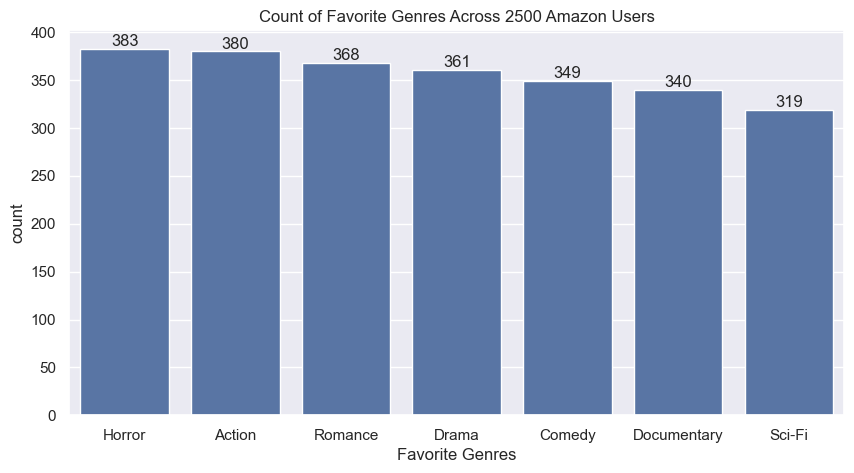

In [50]:
sns.set_theme(
    rc={'figure.figsize':(10,5)} # Needed to be wide enough to accommodate the genre types
)
bplt = sns.barplot(
    data=favorite_genres,
    x='Favorite Genres',
    y='count'
)

bplt.bar_label(bplt.containers[0]) # I wanted to add data labels

# Count updates alongside data stored in amazon_users
plt.title(f'Count of Favorite Genres Across {len(amazon_users)} Amazon Users'); # Don't need to print out debug statement

#### Pie Charts

This will likely be the last time we use this kind of chart, but because it was brought up in the lesson, it will be to include for consistency's sake.

Let's take a look at the `Payment Information` column.

In [51]:
# count the amount of each payment type
payment_information = amazon_users[['Payment Information']].groupby('Payment Information').value_counts().reset_index()
payment_information = payment_information.sort_values(by='count', ascending=False)
payment_information

,Payment Information,count
1,Mastercard,856
2,Visa,838
0,Amex,806


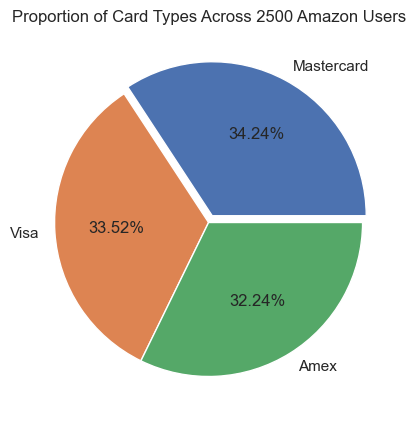

In [52]:
# create 'explode' variable to designates which pie section will stand out
explode = [0] * len(payment_information)
# Since we want to highlight the highest value, we will choose the 0th element because we sorted the DF
explode[0] = .05

# plot
plt.pie(
    x=payment_information['count'],
    labels=payment_information['Payment Information'],
    explode=explode,
    autopct='%.2f%%' # formatting data labels
)

plt.title(f'Proportion of Card Types Across {len(amazon_users)} Amazon Users');

#### Takeaways

Considering the three chart types used above, bar charts are the most useful and most reliable. In terms of utility, a bar chart displays the raw count, while a pictograph requires users to do additional computations on their own that could result in misinterpretations. The pie chart used above could have displayed raw counts, but can be difficult to use when slices represent similar proportions of a dataset as seen above. It's more difficult for our brains to distinguish between angles than it is for us to distinguish between lengths, so it's generally safer to use bar charts.

If stakeholders insist on using the other two methods over a bar chart, make sure to take additional steps to increase the ease of use and decrease the likelihood of mistakes through the use of annotation/labeling, sorting, coloring, and other formatting that can help users quickly discern the necessary insights from your charts.

## Two-way Tables

### to-do's

- ~~Better explanations of each relative frequency table~~
- ~~Noting whether or not there's a relationship between gender and engagement or engagement and gender~~
- ~~How to distinguish and identify how to answer these questions from a given relative frequency table~~
- Address warning messages/decide to ignore them

### Preparation

Initially, use the `.groupby()` and `.value_counts()` functions to count the number of occurrences for each `Gender` and `Engagement Metrics` pair.

In [64]:
# count how many of each engagement metrics occurs for each gender in the dataset
two_way_table = amazon_users[['Gender', 'Engagement Metrics']].groupby(['Gender','Engagement Metrics']).value_counts()
# remove index hierarchy in preparation to create two-way table formatting
two_way_table = two_way_table.reset_index()
# format table
two_way_table = two_way_table.pivot_table('count', 'Gender', 'Engagement Metrics')
two_way_table

C:\Users\chris\AppData\Local\Temp\ipykernel_3516\1083768943.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  two_way_table = amazon_users[['Gender', 'Engagement Metrics']].groupby(['Gender','Engagement Metrics']).value_counts()
C:\Users\chris\AppData\Local\Temp\ipykernel_3516\1083768943.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  two_way_table = two_way_table.pivot_table('count', 'Gender', 'Engagement Metrics')


Engagement Metrics,Low,Medium,High
Gender,,,
Female,405.0,401.0,434.0
Male,416.0,433.0,411.0


Add row totals as a column and column totals as a row.

In [65]:
# row totals
two_way_table['Total'] = two_way_table.apply(lambda x: np.sum(x), axis = 1)
# column totals
two_way_table.loc['Total'] = two_way_table.sum()
# return table
two_way_table

Engagement Metrics,Low,Medium,High,Total
Gender,,,,
Female,405.0,401.0,434.0,1240.0
Male,416.0,433.0,411.0,1260.0
Total,821.0,834.0,845.0,2500.0


### % Grand total

This relative frequency table displays the proportion of each unique observation in the dataset. For instance, out of all 2500 users, 17.36% were female users with low engagement.

In [72]:
nrows = len(two_way_table)
ncols = len(two_way_table.columns)
two_way_table.apply(lambda x: 100 * x / two_way_table.iloc[nrows - 1, ncols - 1])

Engagement Metrics,Low,Medium,High,Total
Gender,,,,
Female,16.20,16.04,17.36,49.6
Male,16.64,17.32,16.44,50.4
Total,32.84,33.36,33.80,100.0


Here we can see that there is roughly equal partitioning of gender, engagement metrics, and the combinations of the two variables.

### % Row totals

Creating relative frequency tables based off of the row totals provides a slightly different representation of the dataset. Relative frequency tables that utilize row total percentages, present the proportion for how often each instance of the column variables occur in conjunction with an instance of a row variable with respect to the total number of instances of the row variable. For example, below we are showing that for all users that are `Female`, roughly `32.7%` are designated with a `Low` `Engagment Metrics` rating.

In [56]:
two_way_table.apply(lambda x: 100 * x / x[-1], axis=1)

C:\Users\chris\AppData\Local\Temp\ipykernel_3516\1301400946.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  two_way_table.apply(lambda x: 100 * x / x[-1], axis=1)


Engagement Metrics,Low,Medium,High,total
Gender,,,,
Female,32.661290,32.338710,35.000000,100.0
Male,33.015873,34.365079,32.619048,100.0
total,32.840000,33.360000,33.800000,100.0


### % Col totals

Similarly to the row total approach, two-way relative frequency tables with column totals shows the proportion for how often each instance of the row variables occur in conjunction with an instance of a column variable with respect to the total number of instances of the column variable. For example, below we are showing that for all users that have a `Low` `Engagement Metrics` rating, roughly `49.3%` are `Female`.

In [57]:
two_way_table.apply(lambda x: 100 * x / x[-1])

C:\Users\chris\AppData\Local\Temp\ipykernel_3516\2754801239.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  two_way_table.apply(lambda x: 100 * x / x[-1])


Engagement Metrics,Low,Medium,High,total
Gender,,,,
Female,49.330085,48.081535,51.360947,49.6
Male,50.669915,51.918465,48.639053,50.4
total,100.000000,100.000000,100.000000,100.0


### Interpretation

Using these three tables ('% Grand Total', '% Column Total', and '% Row Total') in conjunction can be helpful in determining if there is an association between the two variables.

To answer this question - in the case of `Gender` and `Engagement Metrics` - it could actually be easier to consider the opposite of association: *independence*. *Independence* is a property in statistics that describes how knowing the probability of one event occurring doesn't change the probability of a separate event occurring.

This topic will be further explored when we cover conditional probability, but it's good to note that we are seeing this underlying problem present here in this table.

With this example in mind we can ask if there is an association between `Gender` and `Engagement Metrics`. To answer this we can approach the problems in two way:

    1. Using the '% Row Totals'
    2. Using the '% Column Totals'

#### 1. Using % Row Totals

If these variables were independent, we would expect that the row percent that represents the percent of women with low engagement metrics to be equal to the total proportion of low engagement metrics across the entire data set.

We see that, in this case, that 32.84% of all users had a low rating, while 32.66% of women had a low rating. Given that these are not equal we could say that there is an association between these two variables*. 

**The difference is minimal, but can accept for now for the sake of the example.*

#### 2. Using % Column Totals

Looking at the table with % Column totals, we see that for users with low engagement, that 49.33% of them are women. However, 49.6% of users are women, and if they were independent, we would expect to see the same percentage in each proportion*.

**Again, for the example.*

# Extraneous

In [58]:
for i in range(1000):
    for j in range(1000,0):
        # if i * j > ((i + j) / 2)**2:
        print(i,j)

In [59]:
lst = [i * (1000 - i) for i in range(1000)]
for i in range(1000):
    j = 1000 - i
    avg = (i + j) / 2
    prod = j * i
    print(i, j, avg, prod)

0 1000 500.0 0
1 999 500.0 999
2 998 500.0 1996
3 997 500.0 2991
4 996 500.0 3984
5 995 500.0 4975
6 994 500.0 5964
7 993 500.0 6951
8 992 500.0 7936
9 991 500.0 8919
10 990 500.0 9900
11 989 500.0 10879
12 988 500.0 11856
13 987 500.0 12831
14 986 500.0 13804
15 985 500.0 14775
16 984 500.0 15744
17 983 500.0 16711
18 982 500.0 17676
19 981 500.0 18639
20 980 500.0 19600
21 979 500.0 20559
22 978 500.0 21516
23 977 500.0 22471
24 976 500.0 23424
25 975 500.0 24375
26 974 500.0 25324
27 973 500.0 26271
28 972 500.0 27216
29 971 500.0 28159
30 970 500.0 29100
31 969 500.0 30039
32 968 500.0 30976
33 967 500.0 31911
34 966 500.0 32844
35 965 500.0 33775
36 964 500.0 34704
37 963 500.0 35631
38 962 500.0 36556
39 961 500.0 37479
40 960 500.0 38400
41 959 500.0 39319
42 958 500.0 40236
43 957 500.0 41151
44 956 500.0 42064
45 955 500.0 42975
46 954 500.0 43884
47 953 500.0 44791
48 952 500.0 45696
49 951 500.0 46599
50 950 500.0 47500
51 949 500.0 48399
52 948 500.0 49296
53 947 500.0 5019

In [60]:
def fxn(x, avg = 500):
    return x * (avg * 2 - x)

def ddx(x, avg = 500):
    return (avg) - x

In [61]:
fxn(1)

999

In [62]:
ddx(1)

499

In [63]:
for i in [0, 250, 500, 750, 1000]:
    print(f'{i}: {fxn(i)}, {ddx(i)}')

0: 0, 500
250: 187500, 250
500: 250000, 0
750: 187500, -250
1000: 0, -500
